In [1]:
!pip install --upgrade pandas dask

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb 
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
X,y = make_classification(n_samples=300,n_features=2,n_classes=4,n_redundant=0,n_clusters_per_class=1,n_informative=2)

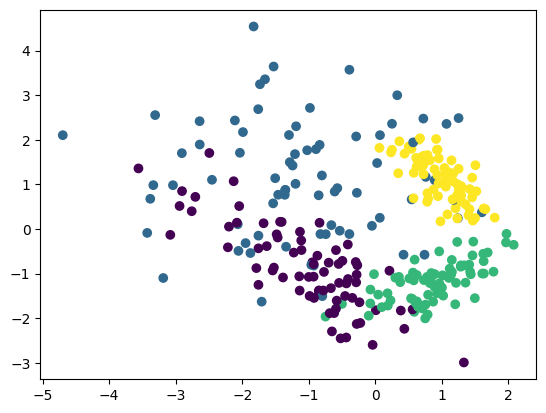

In [4]:
plt.scatter(X[:,0],X[:,1],c=y);

In [5]:
def plot_decision_boundary(data,labels,clf):
    plot_step = 0.02
    x_min, x_max = data[:,0].min() -1, data[:,0].max() + 1
    y_min,y_max = data[:,1].min() -1 , data[:,1].max() + 1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))
    Z = np.array(clf.predict(np.c_[xx.ravel(),yy.ravel()]))
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap='cool')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.scatter(data[:,0],data[:,1],c=labels,cmap='hot',s=20)
    plt.show()

### Question a (3 points)

In [6]:
print(len(X), len(y), 0.2*len(X))

300 300 60.0


In [7]:
train = X[:240]
test = X[240:]

In [8]:
y_train = y[:240]
y_test = y[240:]

### Question b (5 points)

In [9]:
t_params = ((10,10,10), (10, 10, 10), (10, 10, 10))

In [10]:
# t_clf = DecisionTreeClassifier(min_samples_leaf = t_min_samples_leaf,max_depth=t_max_depth,random_state=123)

In [11]:
for p1,p2,p3 in t_params:
    
    t_clf = DecisionTreeClassifier(max_depth=p1,min_samples_leaf=p2, random_state = p3)
    t_clf.fit(train, y_train)
    t_pred_test = t_clf.predict(test)
    print(accuracy_score(y_test, t_pred_test))
    print(confusion_matrix(t_pred_test,y_test))
    

0.7666666666666667
[[11  5  2  0]
 [ 4  9  0  2]
 [ 0  1 12  0]
 [ 0  0  0 14]]
0.7666666666666667
[[11  5  2  0]
 [ 4  9  0  2]
 [ 0  1 12  0]
 [ 0  0  0 14]]
0.7666666666666667
[[11  5  2  0]
 [ 4  9  0  2]
 [ 0  1 12  0]
 [ 0  0  0 14]]


### Question c (5 points)

In [12]:
rf_params = ((10,'sqrt',50,20), (20,'sqrt',20,40), (30,'sqrt',10,50))

In [13]:
#     rf_clf = RandomForestClassifier(n_estimators=rf_n_estimators,
#                                     max_depth=rf_max_depth,
#                                     min_samples_leaf=rf_min_samples_leaf,
#                                     max_features=rf_max_features)

In [14]:
for p1,p2,p3,p4 in rf_params:
    
    rf_clf = RandomForestClassifier(n_estimators=p1, max_features=p2, min_samples_leaf=p3, max_depth=p4)
    rf_clf.fit(train, y_train)
    rf_pred_test = rf_clf.predict(test)
    print(accuracy_score(y_test, rf_pred_test))
    print(confusion_matrix(rf_pred_test,y_test))
    

0.8166666666666667
[[ 9  2  0  0]
 [ 5 10  0  0]
 [ 1  1 14  0]
 [ 0  2  0 16]]
0.8166666666666667
[[ 9  2  1  0]
 [ 5 11  0  0]
 [ 1  1 13  0]
 [ 0  1  0 16]]
0.8333333333333334
[[ 9  2  0  0]
 [ 5 11  0  0]
 [ 1  1 14  0]
 [ 0  1  0 16]]


### Question d (5 points)

In [15]:
ada_params = ((2,5,0.1), (4,10,0.5), (10,20,0.3))

In [16]:
# ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=ada_m_depth),
#                              n_estimators=ada_n_estimators,
#                              learning_rate=ada_learning_rate,
#                              algorithm="SAMME.R")

In [17]:
for p1,p2,p3 in ada_params:
    
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=p1),n_estimators=p2, learning_rate=p3)
    ada_clf.fit(train, y_train)
    ada_pred_test = ada_clf.predict(test)
    print(accuracy_score(y_test, ada_pred_test))
    print(confusion_matrix(ada_pred_test,y_test))
    

0.8
[[10  2  0  0]
 [ 4 10  0  2]
 [ 1  1 14  0]
 [ 0  2  0 14]]
0.7333333333333333
[[ 9  3  0  0]
 [ 5 11  0  6]
 [ 1  1 14  0]
 [ 0  0  0 10]]
0.75
[[11  3  0  0]
 [ 4 10  0  6]
 [ 0  1 14  0]
 [ 0  1  0 10]]


### Question e (10 points)

In [18]:
# gb_clf = lgb.LGBMClassifier(boosting_type='dart',max_depth=4,n_estimators=400,objective='multi_class',min_data_in_leaf=1600,
#                             reg_lambda = 0.6,learning_rate=0.2)

In [ ]:
# Example parameter grid
lgb_params = [
    (31, 3, 0.1, 100, 20),  # num_leaves, max_depth, learning_rate, n_estimators, min_data_in_leaf
    (15, 5, 0.05, 200, 30),
    (63, -1, 0.2, 150, 10)  # -1 for max_depth means no limit
]

for num_leaves, max_depth, learning_rate, n_estimators, min_data_in_leaf in lgb_params:
    lgb_clf = lgb.LGBMClassifier(
        num_leaves=num_leaves,
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        min_data_in_leaf=min_data_in_leaf
    )
    
    # Fit the model
    lgb_clf.fit(train, y_train)
    
    # Predictions
    lgb_pred_test = lgb_clf.predict(test)
    
    # Evaluation
    print("Accuracy:", accuracy_score(y_test, lgb_pred_test))
    print("Confusion Matrix:\n", confusion_matrix(y_test, lgb_pred_test))


### Question f (2 points)

In [ ]:
plot_decision_boundary(test, y_test, t_clf)

In [ ]:
t_pred_test